In [156]:
# import dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # visualizations
import re # regex
import string # handle string
import math # perform mathematical operations
import nltk

# load & format data
df = pd.read_csv("C:\\Users\\20jam\\Documents\\github\\my-code\\fulldata_cleantext.csv")
df = df[["id","subreddit", "score", "clean_selftext", "upvote_ratio", "created_utc"]]
text_df = df[["subreddit", "clean_selftext"]]
df_grouped = text_df.groupby(by = 'subreddit').agg(lambda x: x.str.cat(sep = " "))
print(df_grouped)

                                                      clean_selftext
subreddit                                                           
MentalHealthSG     hey everyone hope alright well want share mile...
NTU                tldr interested hpxxx developmental psychology...
NationalServiceSG  people say half war report mental illness long...
SGExams            ofs long period time sit really reflect unsolv...
SingaporePoly      hi anyone know ite polytechnic student industr...
SingaporeRaw       unusual time life comfort dessert depend singa...
askSingapore       know mostly test child really need know wrong ...
nus                incoming rdyear fas double major usp academica...
singapore          teen found sex ed rather adequate taught judgy...
singaporefi        dependent instead buying life insurance total ...


In [157]:
# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')
data = cv.fit_transform(df_grouped['clean_selftext'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

aa  aaa  aaaa  aaaaa  aaaaaa  aaaaaaa  aaaaaaaaaaaaaaaa  \
subreddit                                                                    
MentalHealthSG      0    0     1      0       0        0                 0   
NTU                 1    0     0      0       0        0                 0   
NationalServiceSG   2    0     0      0       0        0                 0   
SGExams            22    6    10      7       3        1                 0   
SingaporePoly       0    0     0      0       0        0                 0   

                   aaaaaaaaaaaaaaaaaaaaaa  aaaaaaaaaaaaaaaaaaaaaaa  \
subreddit                                                            
MentalHealthSG                          0                        0   
NTU                                     0                        0   
NationalServiceSG                       0                        0   
SGExams                                 1                        0   
SingaporePoly                           0                        0   

                   aaaaaaaaaaaaaaaaaaaaaaaaaa  ...  zuzul  zxa  zy  zygote  \
subreddit                                      ...                           
MentalHealthSG                              0  ...      0    0   0       0   
NTU                                         0  ...      0    0   0       0   
NationalServiceSG                           0  ...      0    0   0       0   
SGExams                                     0  ...      0    0   0       1   
SingaporePoly                               0  ...      0    0   0       0   

                   zz  zzz  zzzz  zzzzz  zzzzzzz  zzzzzzzzzzzzzzzzzzzzz  
subreddit                                                                
MentalHealthSG      0    0     0      0        0                      0  
NTU                 0    1     0      0        0                      0  
NationalServiceSG   0    0     2      0        0                      0  
SGExams             5   14     7      4        1                      1  
SingaporePoly       0    0     0      0        0                      0  

[5 rows x 48792 columns]

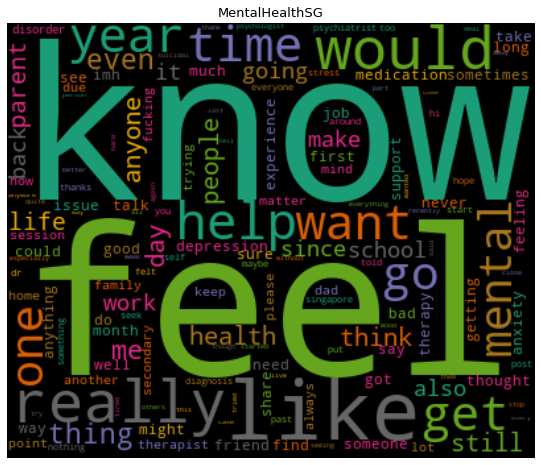

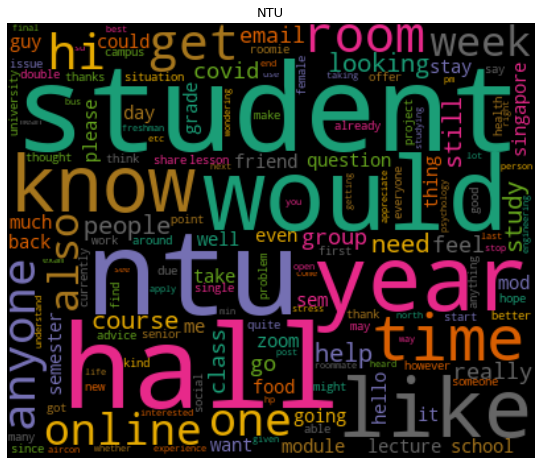

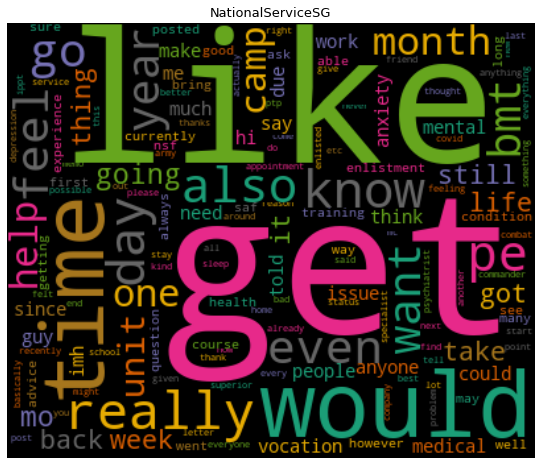

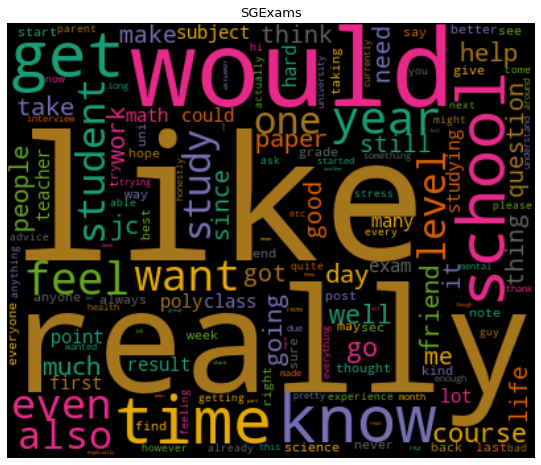

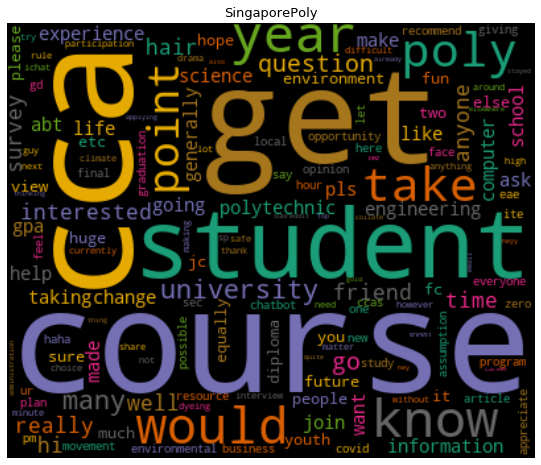

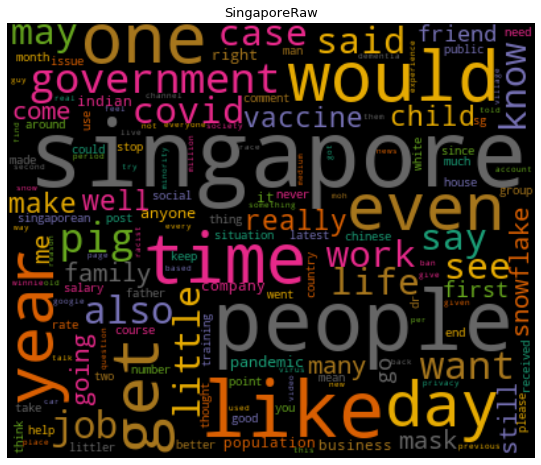

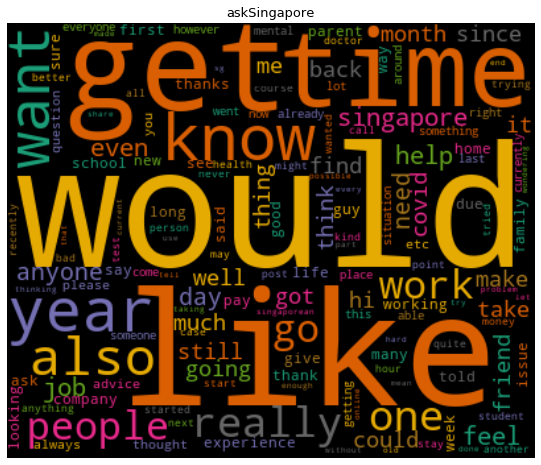

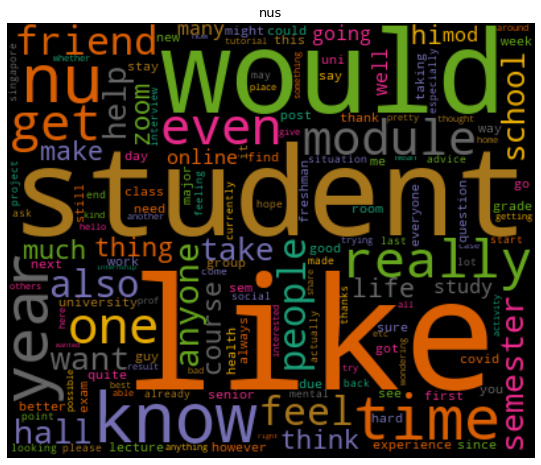

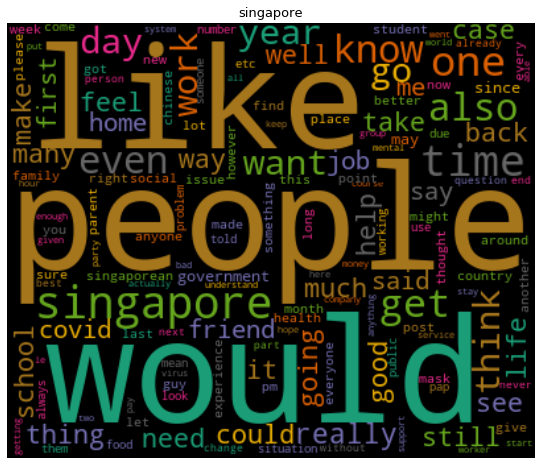

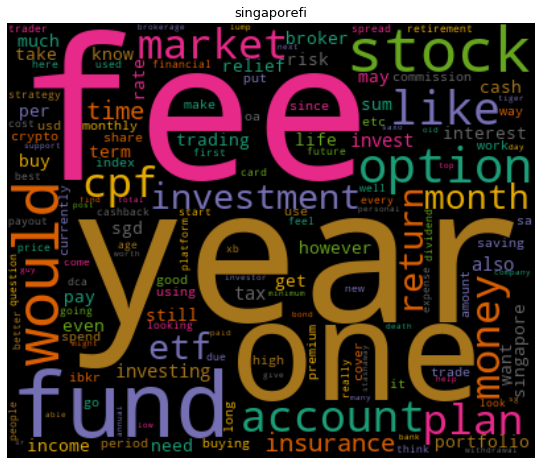

In [158]:
# generate wordcloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width = 400, height = 330, max_words = 150, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)), fontsize = 13)
  plt.show()
  
# transpose document term matrix
df_dtm = df_dtm.transpose()

# plotting word cloud for subreddit
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending = False), product)

In [159]:
# calculate sentiment polarity
from textblob import TextBlob
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        if type(text) == float:
            pass
df['polarity'] = df['clean_selftext'].apply(lambda x: polarity(x))

# view top (from bottom and above) output of sentiment polarity analysis
print("3 Random Reviews with Highest Polarity:")
for index, txt in enumerate(df.iloc[df['polarity'].sort_values(ascending = False)[:3].index]['clean_selftext']):
  print('Review {}:\n'.format(index + 1), txt)
print()
print("3 Random Reviews with Lowest Polarity:")
for index, txt in enumerate(df.iloc[df['polarity'].sort_values(ascending = True)[:3].index]['clean_selftext']):
  print('Review {}:\n'.format(index + 1),txt)

3 Random Reviews with Highest Polarity:
Review 1:
 best wish everyone period time hbl extended u affected maybe bell curve save useither way togethergood luck everyone level
Review 2:
 hi people done w o j taking pcme rjc would like know student life stress acads ccas please comment try best answer you disclaimer ip student might knowledgeable like o lr cop stuff
Review 3:
 best way get pet covid pre event test sunday attend event monday

3 Random Reviews with Lowest Polarity:
Review 1:
 terrible must trump supporter
Review 2:
 men swing glass bottle one another throw onto oncoming traffic violent orchard fight police
Review 3:
 listening lockdown announcement people called idiot asking singaporean wearing mask may start queue mask


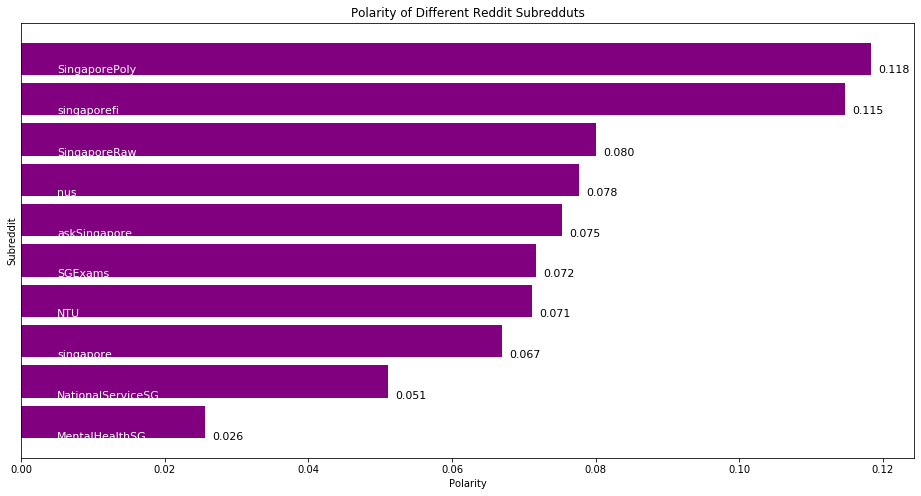

In [160]:
# compare polarity accross subreddit
subreddit_polarity_sorted=pd.DataFrame(df.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Reddit Subredduts')
polarity_graph=plt.barh(np.arange(len(subreddit_polarity_sorted.index)),subreddit_polarity_sorted['polarity'],color='purple',)

# writing names on bar
for bar,subreddit in zip(polarity_graph,subreddit_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(subreddit),va='center',fontsize=11,color='white')
# writing polarity values on graph
for bar,polarity in zip(polarity_graph,subreddit_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

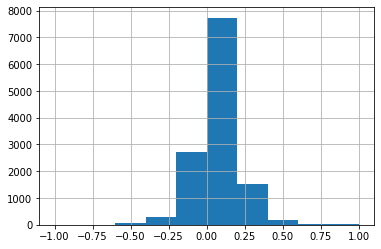

In [161]:
# polarity histogram
df['polarity'].hist()

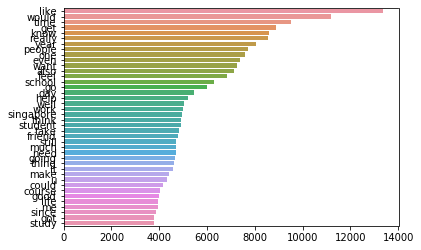

In [162]:
# most commonly used words
corpus = []
new = df['clean_selftext'].str.split()
new = new.values.tolist()
for i in new:
    if type(i) == list:
        for word in i:
                corpus.append(word)

from collections import Counter
counter = Counter(corpus)
most = counter.most_common()
x, y= [], []
for word, count in most[:40]:
    x.append(word)
    y.append(count)
        
import seaborn as sns
sns.barplot(x=y,y=x)

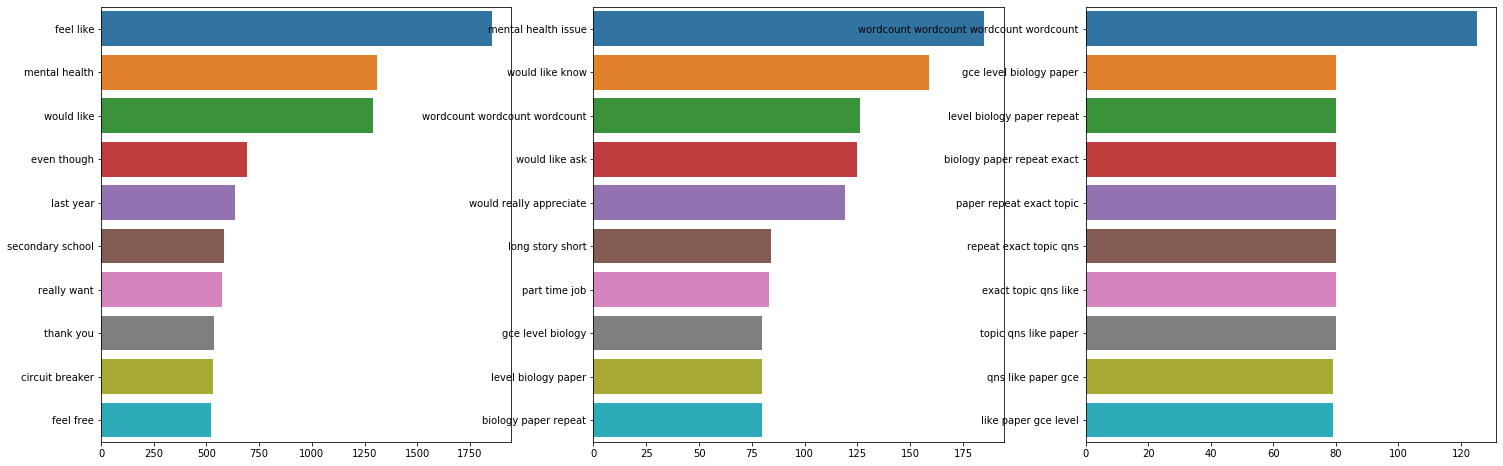

In [163]:
# ngram analysis
def get_top_ngram(corpus, n = None):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:10]

input = df.dropna(subset = ["clean_selftext"])
fig, axs = plt.subplots(ncols = 3, figsize = (25, 8))
top_n_bigrams = get_top_ngram(input["clean_selftext"], 2)[:10] 
x,y = map(list,zip(*top_n_bigrams)) 
sns.barplot(x = y,y = x, ax = axs[0])
top_tri_grams=get_top_ngram(input["clean_selftext"], n = 3)
x,y = map(list,zip(*top_tri_grams))
sns.barplot(x = y, y = x, ax = axs[1])
top_quad_grams=get_top_ngram(input["clean_selftext"], n = 4)
x,y  =map(list,zip(*top_quad_grams))
sns.barplot(x = y,y = x, ax = axs[2])

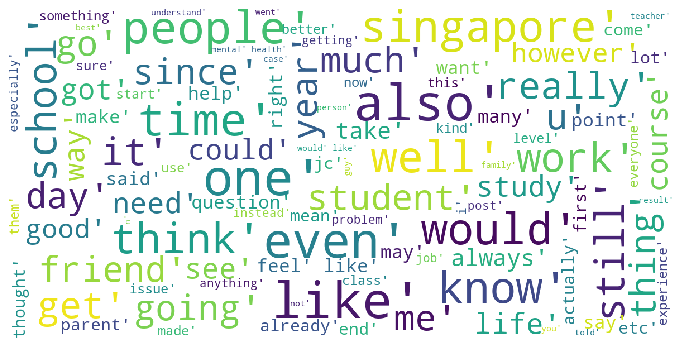

In [164]:
# overall wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 100,
        max_font_size = 30,
        scale = 3,
        random_state = 1)
    wordcloud = wordcloud.generate(str(data))
    fig = plt.figure(1, figsize = (12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

<BarContainer object of 3 artists>

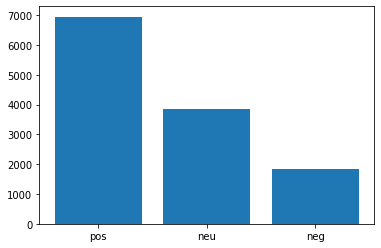

In [165]:
# compare freq of sentiment (using polarity)
def sentiment(x):
    if x < -0.05:
        return 'neg'
    elif x >= -0.05 and x <= 0.05:
        return 'neu'
    else:
        return 'pos'

df['polarity_s'] = df['polarity'].\
   map(lambda x: sentiment(x))
plt.bar(df.polarity_s.value_counts().index,
        df.polarity_s.value_counts())

In [166]:
# display examples of negative sentiment instances
df[df['polarity_s']=='neg']['clean_selftext'].head()

3     ofs long period time sit really reflect unsolv...
4     facing severe adjustment problem mental breakd...
10    hear lot people saying diagnosed mental disord...
15    experiencing symptom anxiety disorder feeling ...
20    haiz many thing want get chest first off growi...
Name: clean_selftext, dtype: object

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\20jam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<BarContainer object of 3 artists>

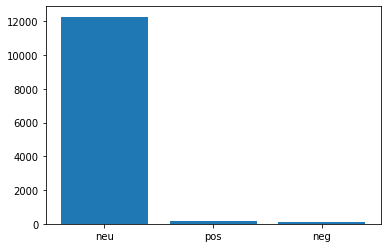

In [167]:
# sentiment analysis using vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    # return ss
    return np.argmax(list(ss.values())[:-1])

df['polarity_t'] = input['clean_selftext'].\
    map(lambda x: get_vader_score(x))
polarity = df['polarity_t'].replace({0:'neg',1:'neu',2:'pos'})

plt.bar(polarity.value_counts().index,
        polarity.value_counts())

In [168]:
# display sample with negative sentiment
df[df['polarity_t']==2]['clean_selftext']

179              curious cu mine taking bloody forever lol
339      curious get significant lifelong benefit chang...
341      currently addicted potato chip want healthy ti...
583      hi posted survey subreddit hour ago informatio...
645                                                 thanks
                               ...                        
12473                         asking friend fevercough flu
12518                         acjc good heard pretty toxic
12523    got caught drama might lose secondary school f...
12528       normal friend quite toxic competitive secretly
12547    hii want know poly work vibe there like isit t...
Name: clean_selftext, Length: 147, dtype: object

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\20jam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


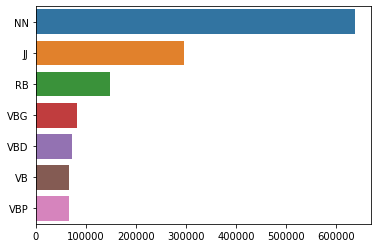

In [169]:
# freq barplot for type of words used - noun, adj, verb etc.
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy
import nltk
#nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

def pos(text):
    pos = nltk.pos_tag(word_tokenize(text))
    pos = list(map(list,zip(*pos)))[1]
    return pos

tags = input['clean_selftext'].apply(lambda x : pos(x))
tags = [x for l in tags for x in l]
counter = Counter(tags)

x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x)

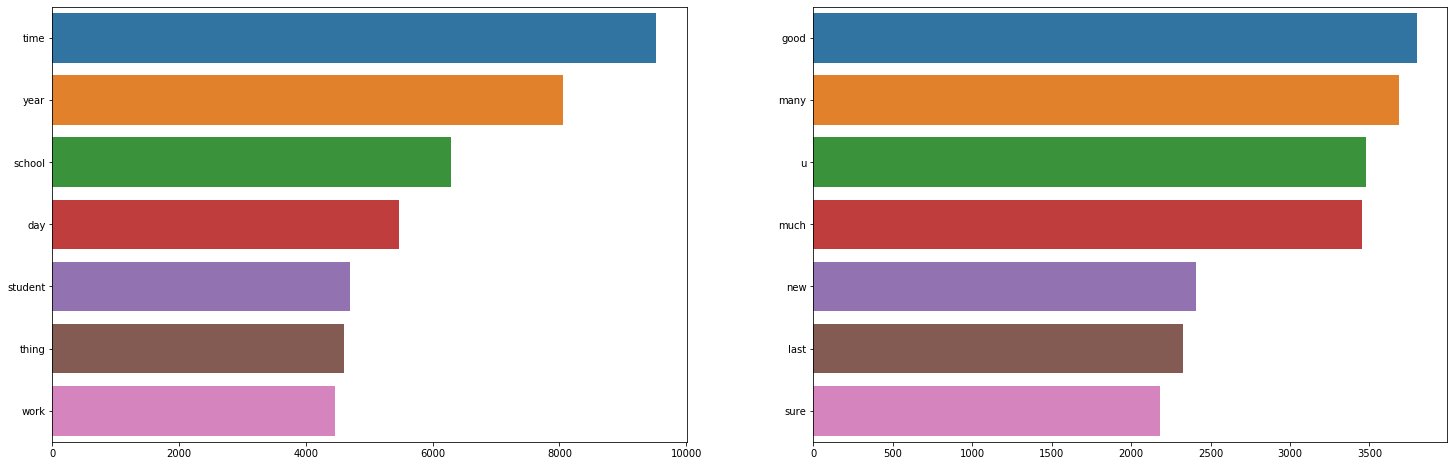

In [170]:
# most commonly used -
from nltk.tokenize import word_tokenize
def get_adjs(text, type_tag): # tag = "NN" noun, "JJ" adjectives, 
    adj = []
    pos = nltk.pos_tag(word_tokenize(text))
    for word, tag in pos:
        if tag == type_tag:
            adj.append(word)
    return adj

fig, axs = plt.subplots(ncols = 2, figsize = (25, 8))
# noun
words = input["clean_selftext"].apply(lambda x : get_adjs(x, type_tag = "NN"))
words = [x for l in words for x in l]
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x, ax = axs[0])
# adjective
words = input["clean_selftext"].apply(lambda x : get_adjs(x, type_tag = "JJ"))
words = [x for l in words for x in l]
counter = Counter(words)
x,y = list(map(list,zip(*counter.most_common(7))))
sns.barplot(x = y,y = x, ax = axs[1])


visualization questions to try out:

In [ ]:
# split data into pre and mid covid
input["created_utc"] = pd.to_datetime(pd.Series(input["created_utc"]), format = "%Y/%m/%d")
preCovid_df = input[(input["created_utc"] < pd.Timestamp(2020, 1, 1))]
midCovid_df = input[(input["created_utc"] > pd.Timestamp(2020, 1, 1))]

comparison between sentiment polarity between study related subreddit and non study subreddit + for before and after covid happened - 2 plots

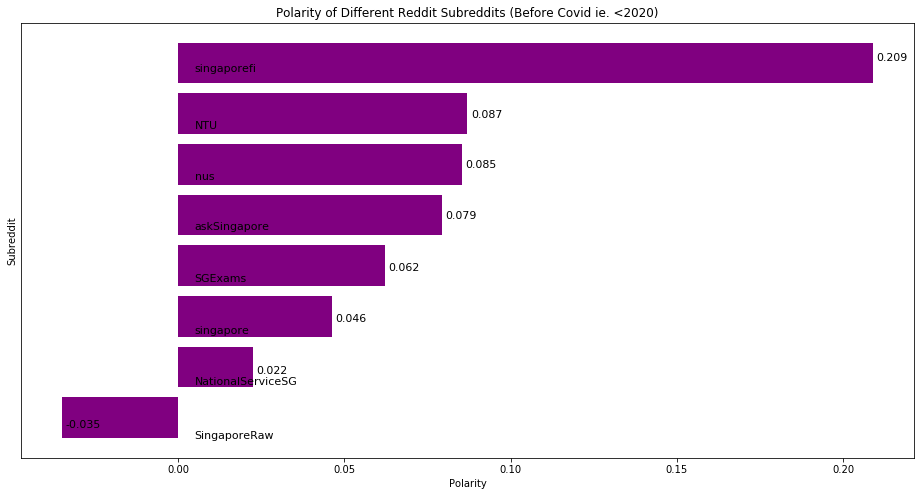

In [172]:
# calculate sentiment polarity
from textblob import TextBlob
def polarity(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        if type(text) == float:
            pass

# precovid stat calc
preCovid_df['polarity'] = preCovid_df['clean_selftext'].apply(lambda x: polarity(x))
subreddit_polarity_sorted=pd.DataFrame(preCovid_df.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))
# plot setting
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Reddit Subreddits (Before Covid ie. <2020)')
polarity_graph=plt.barh(np.arange(len(subreddit_polarity_sorted.index)),subreddit_polarity_sorted['polarity'],color='purple',)
# writing names on bar
for bar,subreddit in zip(polarity_graph,subreddit_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width()+0.08,'{}'.format(subreddit),va='center',fontsize=11,color='black')
# writing polarity values on graph
for bar,polarity in zip(polarity_graph,subreddit_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width()+ 0.3,'%.3f'%polarity,va='center',fontsize=11,color='black')
# display plot
plt.yticks([])
plt.show()


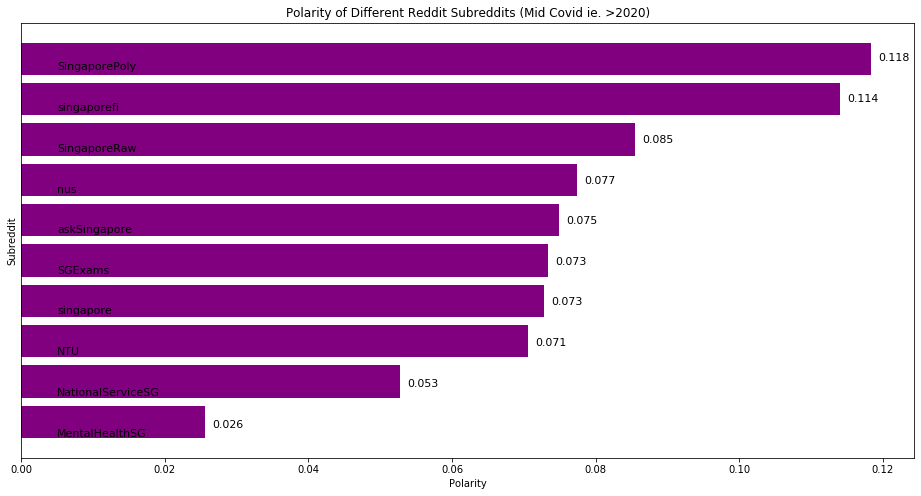

In [178]:
# midcovid stat calc
midCovid_df['polarity'] = midCovid_df['clean_selftext'].apply(lambda x: polarity(x))
subreddit_polarity_sorted=pd.DataFrame(midCovid_df.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))
# plot setting
plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Subreddit')
plt.title('Polarity of Different Reddit Subreddits (Mid Covid ie. >2020)')
polarity_graph=plt.barh(np.arange(len(subreddit_polarity_sorted.index)),subreddit_polarity_sorted['polarity'],color='purple',)
# writing names on bar
for bar,subreddit in zip(polarity_graph,subreddit_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width()+0.08,'{}'.format(subreddit),va='center',fontsize=11,color='black')
# writing polarity values on graph
for bar,polarity in zip(polarity_graph,subreddit_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width()+ 0.3,'%.3f'%polarity,va='center',fontsize=11,color='black')
# display plot
plt.yticks([])
plt.show()

word cloud to give hint about reasons for mental health deteoration/ what form does this deteoration take + need comparison before and mid covid - 2 plots
alr have wordclouds for each subreddit (all time)
now need 1 wordcloud for each subreddit during pre and post respectively

In [193]:
# pre-covid
text_df = preCovid_df[["subreddit", "clean_selftext"]]
df_grouped = text_df.groupby(by = 'subreddit').agg(lambda x: x.str.cat(sep = " "))

# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')
data = cv.fit_transform(df_grouped['clean_selftext'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

aa  aaaa  aaaaa  aaaaaaaaaaaaaaaaaaaaaaa  \
subreddit                                                     
NTU                 0     0      0                        0   
NationalServiceSG   0     0      0                        0   
SGExams             3     0      1                        0   
SingaporeRaw        0     0      0                        0   
askSingapore        0     0      0                        0   

                   aaaaaaaaaaaaaaaaaaaaaaaaaa  aar  aaron  ab  aback  abandon  \
subreddit                                                                       
NTU                                         0    0      0   0      0        0   
NationalServiceSG                           0    0      0   1      0        0   
SGExams                                     0    0      0   2      0        0   
SingaporeRaw                                0    0      0   0      0        0   
askSingapore                                0    0      0   0      0        1   

                   ...  zouk  zoukidisco  zoukout  zouks  zscaler  zulkiflie  \
subreddit          ...                                                         
NTU                ...     0           0        0      0        0          0   
NationalServiceSG  ...     0           0        0      0        0          0   
SGExams            ...     0           0        0      0        0          0   
SingaporeRaw       ...     0           0        0      0        0          0   
askSingapore       ...     0           0        0      0        1          0   

                   zygote  zz  zzz  zzzz  
subreddit                                 
NTU                     0   0    0     0  
NationalServiceSG       0   0    0     0  
SGExams                 1   1    5     0  
SingaporeRaw            0   0    0     0  
askSingapore            0   0    0     0  

[5 rows x 22129 columns]

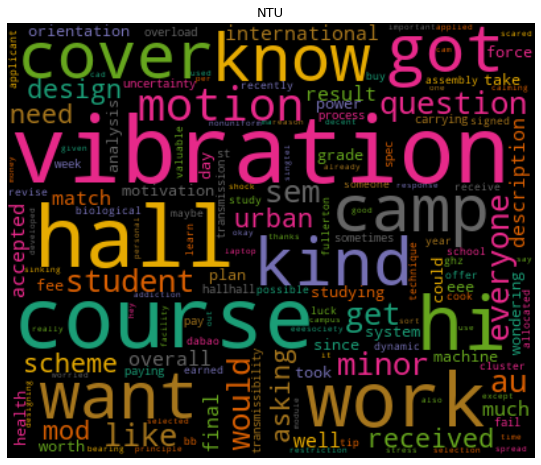

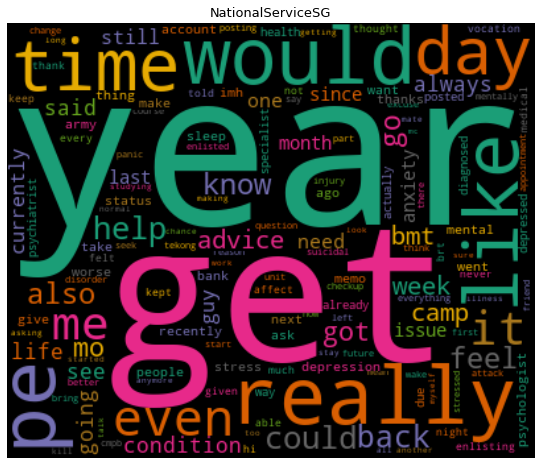

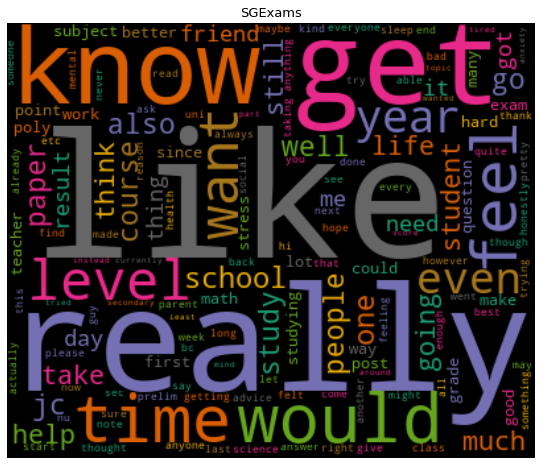

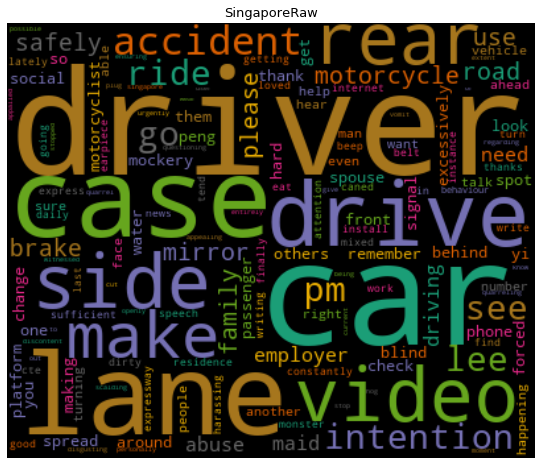

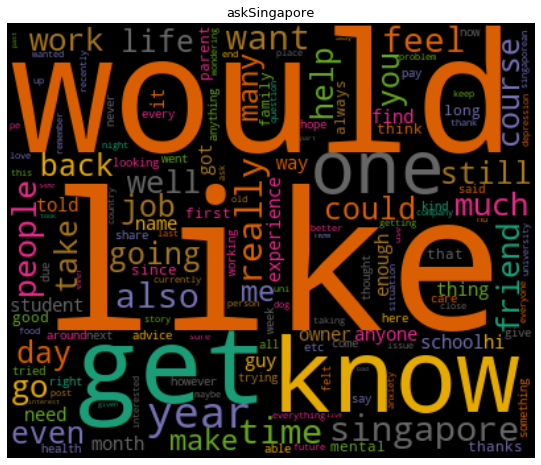

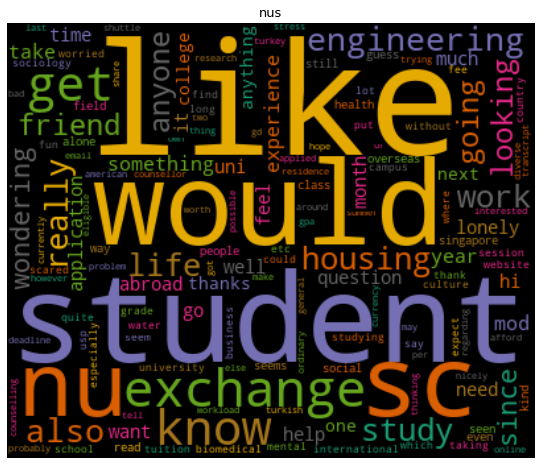

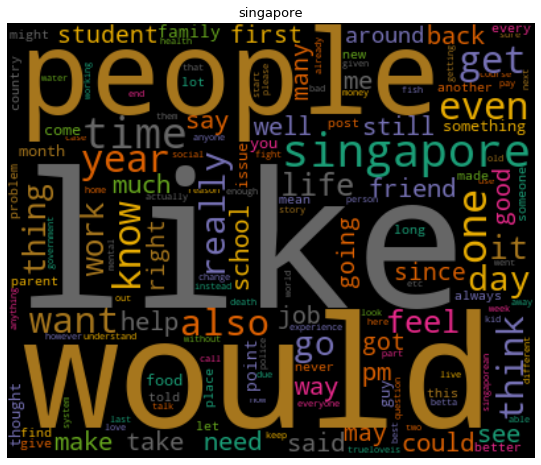

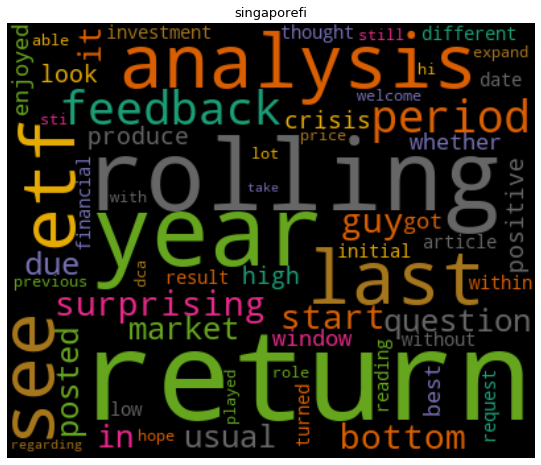

In [194]:
# generate wordcloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width = 400, height = 330, max_words = 150, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)), fontsize = 13)
  plt.show()
  
# transpose document term matrix
df_dtm = df_dtm.transpose()

# plotting word cloud for subreddit
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending = False), product)

In [195]:
# pre-covid
text_df = midCovid_df[["subreddit", "clean_selftext"]]
df_grouped = text_df.groupby(by = 'subreddit').agg(lambda x: x.str.cat(sep = " "))

# create document term matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = 'word')
data = cv.fit_transform(df_grouped['clean_selftext'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head()

aa  aaa  aaaa  aaaaa  aaaaaa  aaaaaaa  aaaaaaaaaaaaaaaa  \
subreddit                                                                    
MentalHealthSG      0    0     1      0       0        0                 0   
NTU                 1    0     0      0       0        0                 0   
NationalServiceSG   2    0     0      0       0        0                 0   
SGExams            19    6    10      6       3        1                 0   
SingaporePoly       0    0     0      0       0        0                 0   

                   aaaaaaaaaaaaaaaaaaaaaa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaa  \
subreddit                                                                  
MentalHealthSG                          0                              0   
NTU                                     0                              0   
NationalServiceSG                       0                              0   
SGExams                                 1                              1   
SingaporePoly                           0                              0   

                   aaaab  ...  zuxhduusej  zuzul  zxa  zy  zz  zzz  zzzz  \
subreddit                 ...                                              
MentalHealthSG         0  ...           0      0    0   0   0    0     0   
NTU                    0  ...           0      0    0   0   0    1     0   
NationalServiceSG      0  ...           0      0    0   0   0    0     2   
SGExams                2  ...           1      0    0   0   4    9     7   
SingaporePoly          0  ...           0      0    0   0   0    0     0   

                   zzzzz  zzzzzzz  zzzzzzzzzzzzzzzzzzzzz  
subreddit                                                 
MentalHealthSG         0        0                      0  
NTU                    0        0                      0  
NationalServiceSG      0        0                      0  
SGExams                4        1                      1  
SingaporePoly          0        0                      0  

[5 rows x 41986 columns]

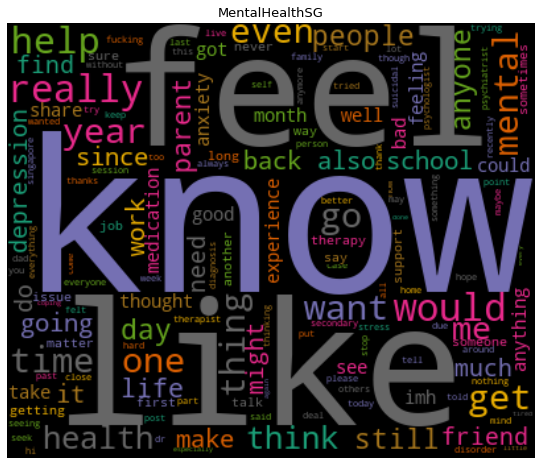

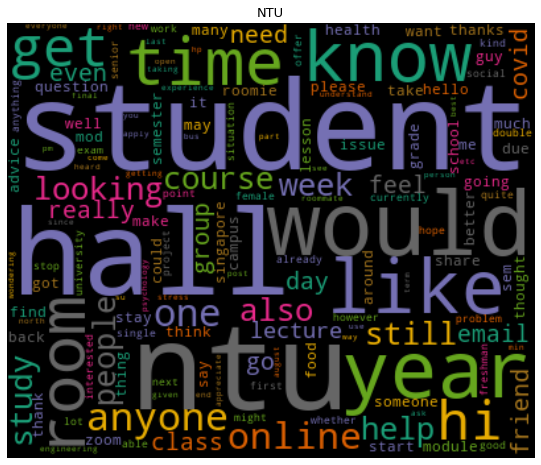

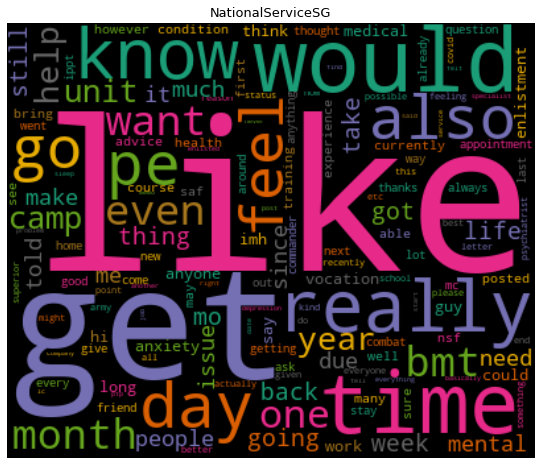

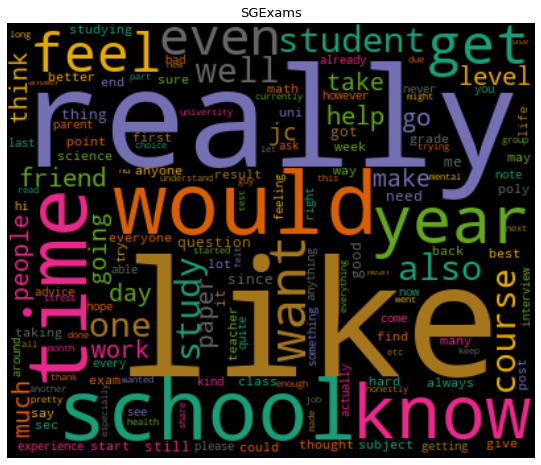

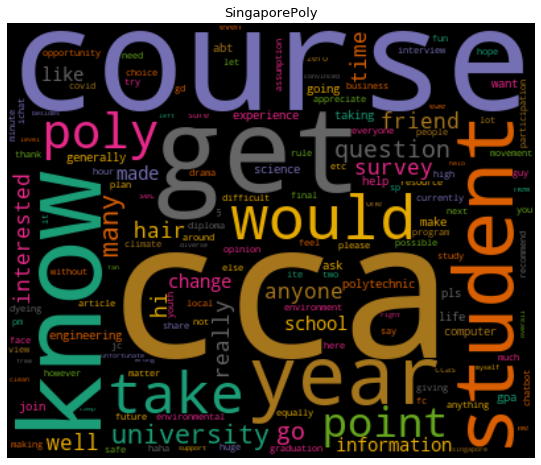

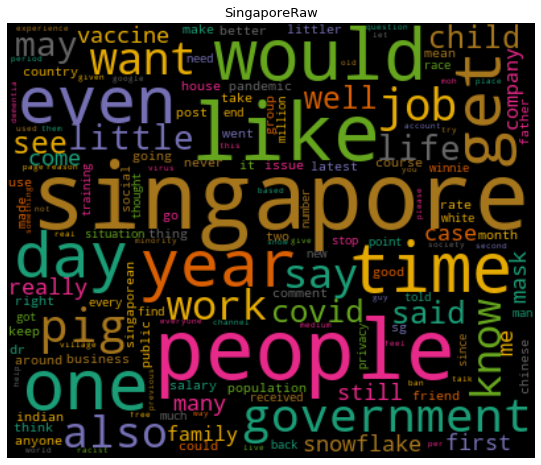

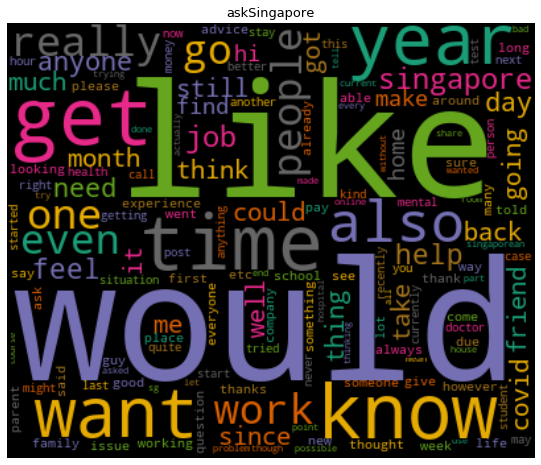

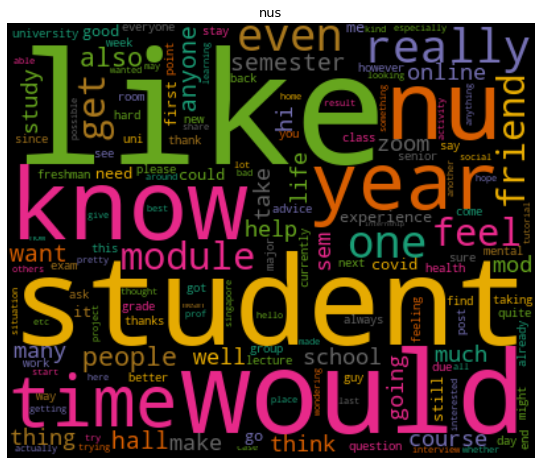

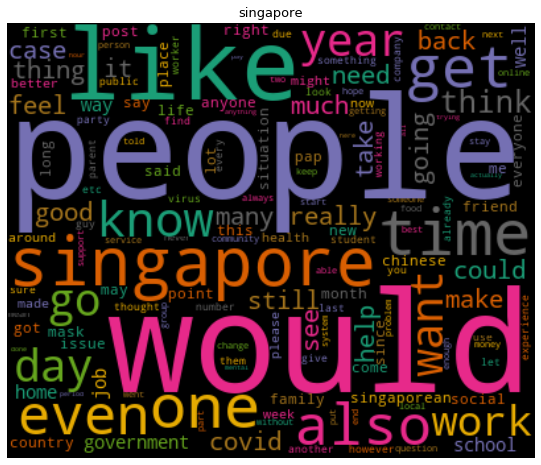

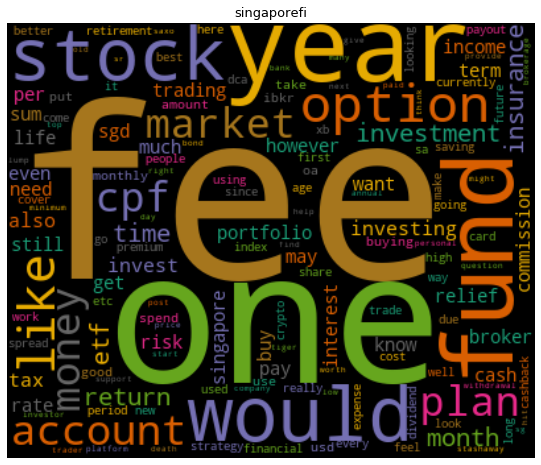

In [196]:
# generate wordcloud
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
  wc = WordCloud(width = 400, height = 330, max_words = 150, colormap = "Dark2").generate_from_frequencies(data)
  plt.figure(figsize = (10,8))
  plt.imshow(wc, interpolation = 'bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)), fontsize = 13)
  plt.show()
  
# transpose document term matrix
df_dtm = df_dtm.transpose()

# plotting word cloud for subreddit
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending = False), product)

number of relavant post in respective subreddits and overall reddit by month (for comparison before and mid covid) - 1 barplot per subreddit and overall

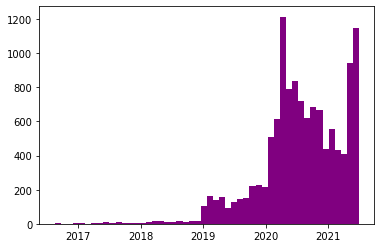

In [189]:
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
dates = input["created_utc"].tolist()
dates = mdates.date2num(input["created_utc"].tolist())
fig, ax = plt.subplots(1,1)
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.hist(dates, bins=50, color='purple')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
plt.show()

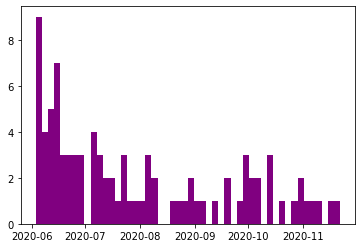

In [191]:
# note that mentalhealthsg is created only Jun 3, 2020
mentalhealth = input[input["subreddit"] == "MentalHealthSG"]
dates = mentalhealth["created_utc"].tolist()
dates = mdates.date2num(mentalhealth["created_utc"].tolist())
fig, ax = plt.subplots(1,1)
locator = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(locator)
ax.hist(dates, bins=50, color='purple')
# ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))